# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Data/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

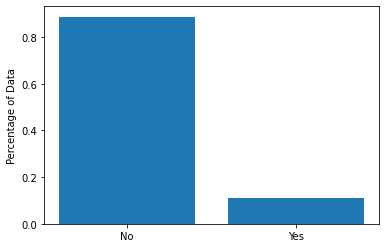

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############

#resampling 
#from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X_scaled, y_train)
X_scaled, y_train = ros.fit_resample(X_scaled, y_train)



# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.197\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'month_mar <= 4.161\ngini = 0.326\nsamples = 19875\nvalue = [15795, 4080]\nclass = No'),
 Text(0.125, 0.375, 'month_oct <= 3.6\ngini = 0.299\nsamples = 19152\nvalue = [15644, 3508]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.27\nsamples = 18411\nvalue = [15447, 2964]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.39\nsamples = 741\nvalue = [197, 544]\nclass = Yes'),
 Text(0.375, 0.375, 'duration <= -0.753\ngini = 0.33\nsamples = 723\nvalue = [151, 572]\nclass = Yes'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.303\nsamples = 703\nvalue = [131, 572]\nclass = Yes'),
 Text(0.75, 0.625, 'duration <= 0.763\ngini = 0.43\nsamples = 31285\nvalue = [9785, 21500]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.496\nsamples = 16268\nvalue = [7363, 8905]\nclass = Yes'),
 Text(0.5625

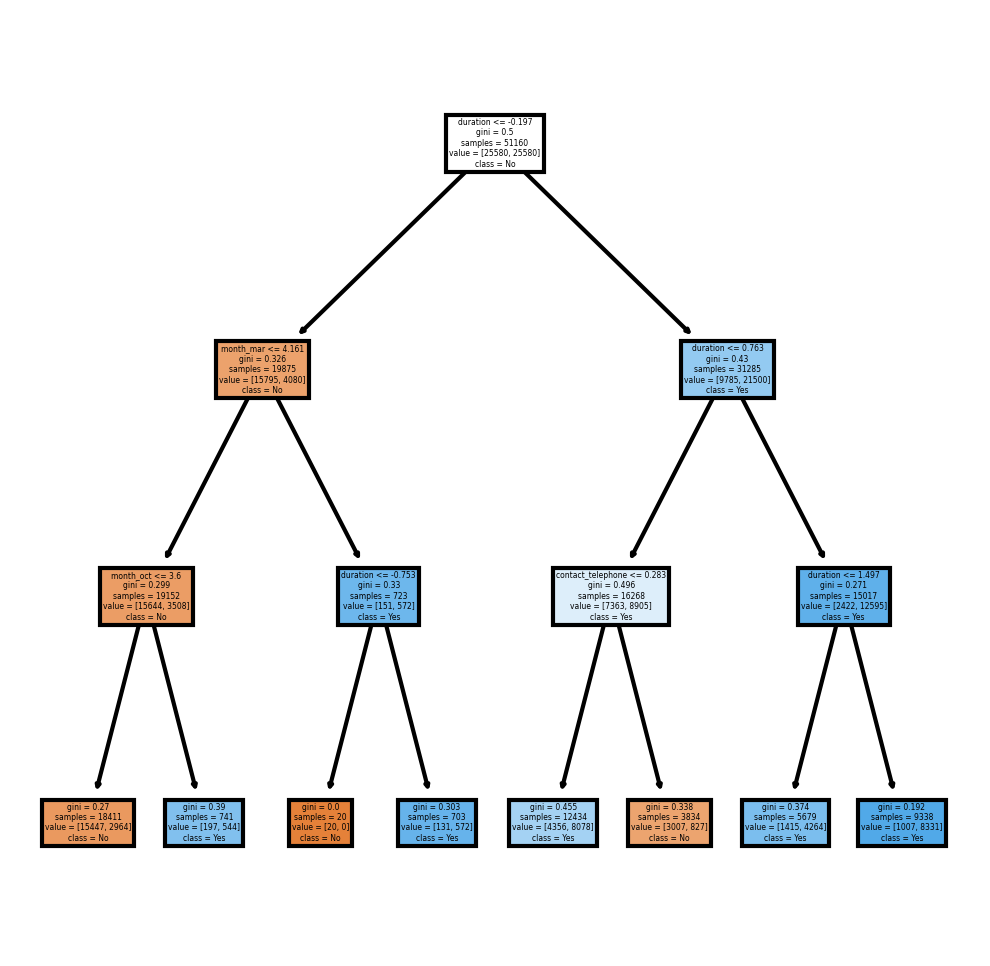

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

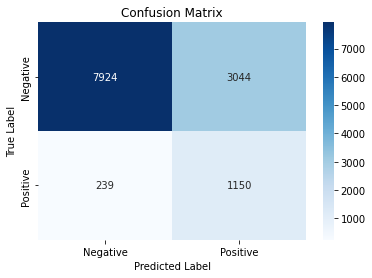

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [16]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7574654042243263


In [17]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

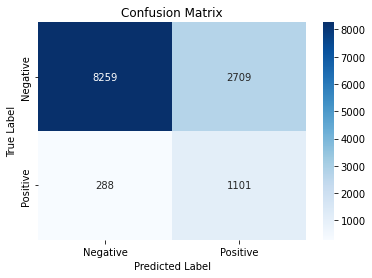

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [21]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

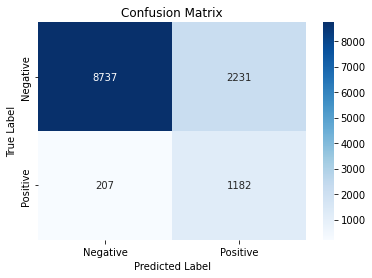

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [23]:
#pip install mlens

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### SET YOUR BASE LEARNERS
base_learners = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    SVC(),
    GaussianNB()
]
super_learner = SuperLearner()
super_learner.add(base_learners)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

In [26]:
### TRAIN YOUR METALEARNER

In [27]:
log_reg = LogisticRegression().fit(base_predictions, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[ 0.04689956,  2.67163448,  0.289907  , 13.06826091,  1.0189015 ]])

The coefficients of the meta learner model (log_reg.coef_) represent the relative importance or weight of each base learner in the super learner model. The base learners used are Logistic Regression, Random Forest Classifier, K Nearest Neighbors Classifier, SVM, and Gaussian Naive Bayes Classifier, and their corresponding predictions are 0.04689956, 2.67163448, 0.289907, 13.06826091, and 1.0189015, respectively.

All coefficients are positive, indicating a positive correlation between the base learners and the outcome variable, which is whether the person would default. The magnitude of the coefficients suggests that the fourth base learner, Support Vector Classifier, is the most strongly correlated with the target variable, while the first base learner, Logistic Regression, and the third base learner, K Nearest Neighbors Classifier, are the least important base learners in predicting the outcome variable.

In [29]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
test_base_predictions = super_learner.predict(X_test)

y_pred = log_reg.predict(test_base_predictions)
y_true = y_test

cm_super = confusion_matrix(y_true, y_pred)

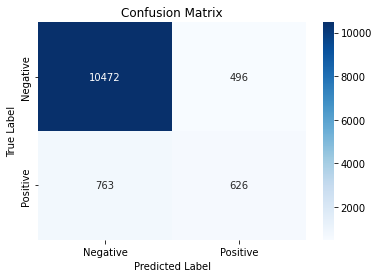

In [30]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specificities (Out of Sample)

In [31]:
# Extract the True Positive, False Negative, True Negative, and False Positive counts

#decision tree
tn_raw, fp_raw, fn_raw, tp_raw = cm_raw.ravel()

#bagged
tn_bag, fp_bag, fn_bag, tp_bag = cm_bag.ravel()

#boosted
tn_boost, fp_boost, fn_boost, tp_boost = cm_bag.ravel()

#super 
tn_super, fp_super, fn_super, tp_super = cm_super.ravel()

In [32]:
#Compute the Sensitivity and Specificity 

#decision tree
sensitivity_raw = tp_raw / (tp_raw + fn_raw)
specificity_raw = tn_raw / (tn_raw + fp_raw)

#bagged
sensitivity_bag = tp_bag / (tp_bag + fn_bag)
specificity_bag = tn_bag / (tn_bag + fp_bag)

#boosted
sensitivity_boost = tp_boost / (tp_boost + fn_boost)
specificity_boost = tn_boost / (tn_boost + fp_boost)

#super 
sensitivity_super = tp_super / (tp_super + fn_super)
specificity_super = tn_super / (tn_super + fp_super)

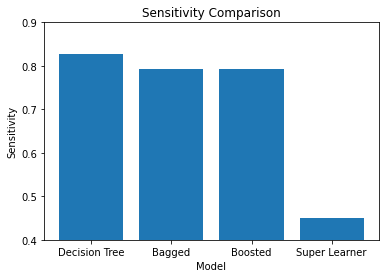

In [33]:
# 2 bar charts

# Define the Sensitivities and Specificities for each model
sensitivities = [sensitivity_raw, sensitivity_bag, sensitivity_boost, sensitivity_super]
specificities = [specificity_raw, specificity_bag, specificity_boost, specificity_super]

# Define the model names
models = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']

# Create a bar chart of the Sensitivities
plt.bar(models, sensitivities)
plt.title('Sensitivity Comparison')
plt.xlabel('Model')
plt.ylabel('Sensitivity')
plt.ylim([0.4, 0.9])
plt.show()


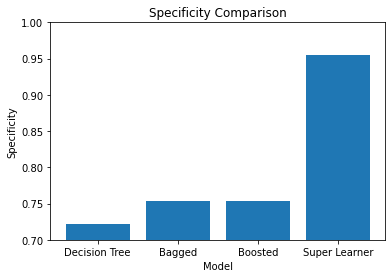

In [34]:
# Create a bar chart of the Specificities
plt.bar(models, specificities)
plt.title('Specificity Comparison')
plt.xlabel('Model')
plt.ylabel('Specificity')
plt.ylim([0.7, 1])
plt.show()



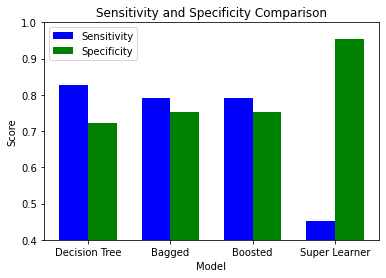

In [35]:
# Create a grouped bar chart of the Sensitivities and Specificities
bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
plt.bar(r1, sensitivities, color='blue', width=bar_width, label='Sensitivity')
plt.bar(r2, specificities, color='green', width=bar_width, label='Specificity')
plt.title('Sensitivity and Specificity Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.ylim([0.4, 1.0])
plt.legend()
plt.show()